# Extracción de Características de Florencia

In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import funpymodeling.exploratory as fp

In [ ]:
df = pd.read_csv('listings - Florencia_clean.csv')
df.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,31840,380378,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,32120,99235,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,32180,13925330,city scrape,Charming Gem - Oltrarno City centre,.,S/D,Cesare,2014-04-05,"Florence, Italy",.,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,39115,167739,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,39165,167739,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722 entries, 0 to 12721
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           12722 non-null  int64  
 1   host_id                      12722 non-null  int64  
 2   source                       12722 non-null  object 
 3   name                         12722 non-null  object 
 4   description                  12722 non-null  object 
 5   neighborhood_overview        12722 non-null  object 
 6   host_name                    12722 non-null  object 
 7   host_since                   12722 non-null  object 
 8   host_location                12722 non-null  object 
 9   host_about                   12722 non-null  object 
 10  host_response_time           12722 non-null  object 
 11  host_response_rate           12722 non-null  object 
 12  host_acceptance_rate         12722 non-null  object 
 13  host_is_superhos

### Análisis Univariado

In [427]:
# Escogemos las 12 variables categóricas disponibles en el dataset
df = df[["source", "host_response_time", "host_is_superhost", "host_verifications", "host_identity_verified", 
         "neighbourhood_cleansed", "property_type", "room_type", "bathrooms_text", "has_availability",
         "instant_bookable", "host_location"]]

In [428]:
# Realizamos el análisis univariado
fp.freq_tbl(df)

            source  frequency  percentage  cumulative_perc
0      city scrape      11884     0.93413          0.93413
1  previous scrape        838     0.06587          1.00000

----------------------------------------------------------------

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour      10063    0.790992         0.790992
1        within a day       1554    0.122151         0.913143
2  within a few hours        901    0.070822         0.983965
3  a few days or more        204    0.016035         1.000000

----------------------------------------------------------------

  host_is_superhost  frequency  percentage  cumulative_perc
0                 f       7613    0.598412         0.598412
1                 t       5109    0.401588         1.000000

----------------------------------------------------------------

                 host_verifications  frequency  percentage  cumulative_perc
0                ['email', 'phone']      10126    0.7959

### Análisis Univariado por Variable

#### Variable "source"

In [429]:
# Realizamos el análisis univariado de la variable "source"
source = fp.freq_tbl(df["source"])
# Quitaremos las columnas "percent" y "cumulative_percent" para que la tabla sea más legible
source.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
source

,source,frequency
0,city scrape,11884
1,previous scrape,838


In [430]:
# Ajustamos el índice (para mayor legibilidad en el gráfico)
source = source.set_index("source")
source

,frequency
source,
city scrape,11884
previous scrape,838


Text(0, 0.5, '')

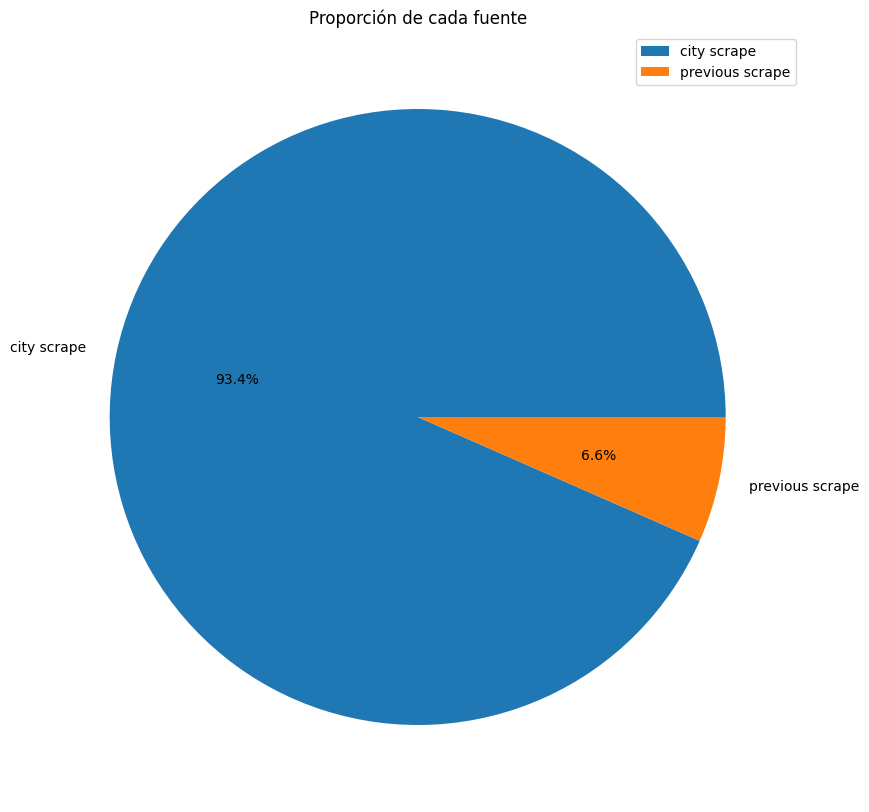

In [431]:
# Generamos un gráfico de pastel para representar la proporción de cada fuente
source.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada fuente")
plt.ylabel("")

#### Variable "host_response_time"

In [432]:
host_response_time = fp.freq_tbl(df["host_response_time"])
host_response_time.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_response_time

,host_response_time,frequency
0,within an hour,10063
1,within a day,1554
2,within a few hours,901
3,a few days or more,204


In [433]:
host_response_time = host_response_time.set_index("host_response_time")
host_response_time

,frequency
host_response_time,
within an hour,10063
within a day,1554
within a few hours,901
a few days or more,204


Text(0, 0.5, 'Frecuencia')

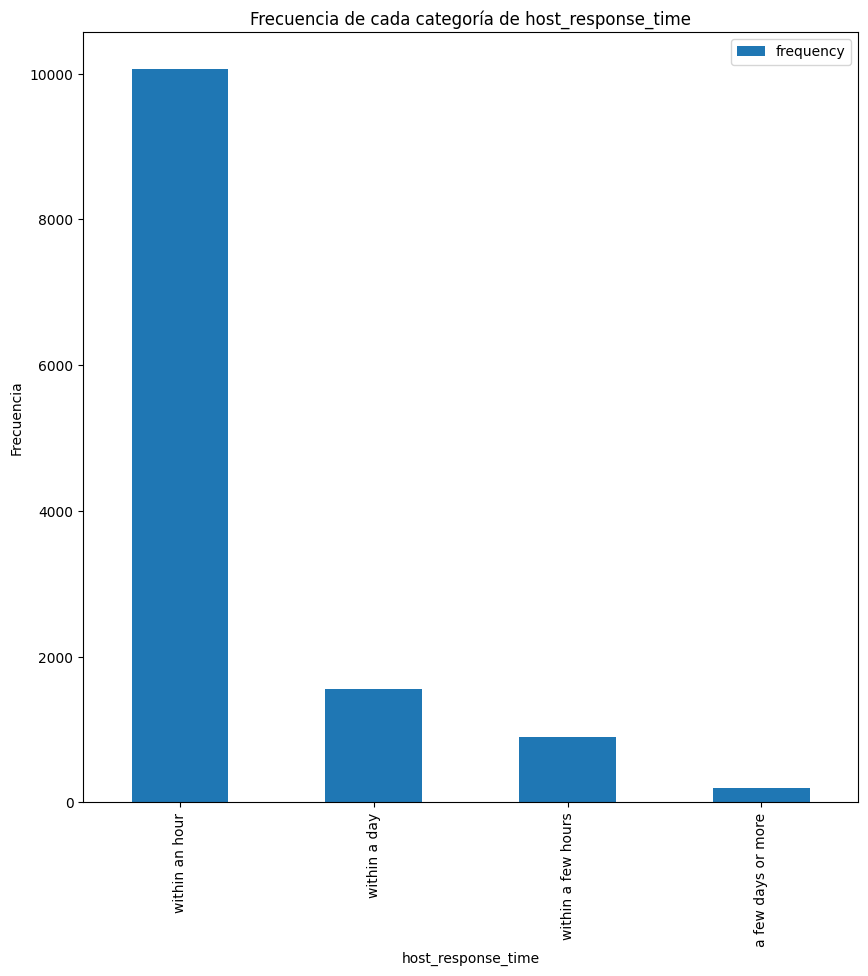

In [434]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_response_time.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_response_time")
plt.ylabel("Frecuencia")

#### Variable "host_is_superhost"

In [435]:
host_is_superhost = fp.freq_tbl(df["host_is_superhost"])
host_is_superhost.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_is_superhost

,host_is_superhost,frequency
0,f,7613
1,t,5109


In [436]:
# Ajustamos el índice
host_is_superhost = host_is_superhost.set_index("host_is_superhost")
host_is_superhost

,frequency
host_is_superhost,
f,7613
t,5109


Text(0, 0.5, '')

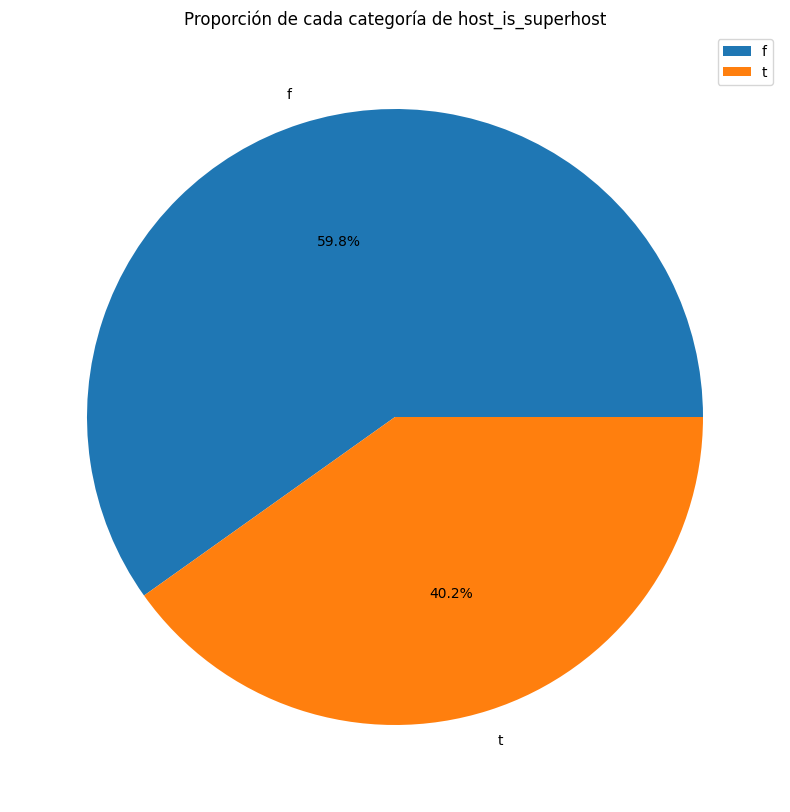

In [437]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
host_is_superhost.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_is_superhost")
plt.ylabel("")

#### Variable "host_identity_verified"

In [438]:
host_identity_verified = fp.freq_tbl(df["host_identity_verified"])
host_identity_verified.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_identity_verified

,host_identity_verified,frequency
0,t,12244
1,f,478


In [439]:
host_identity_verified = host_identity_verified.set_index("host_identity_verified")
host_identity_verified

,frequency
host_identity_verified,
t,12244
f,478


Text(0, 0.5, '')

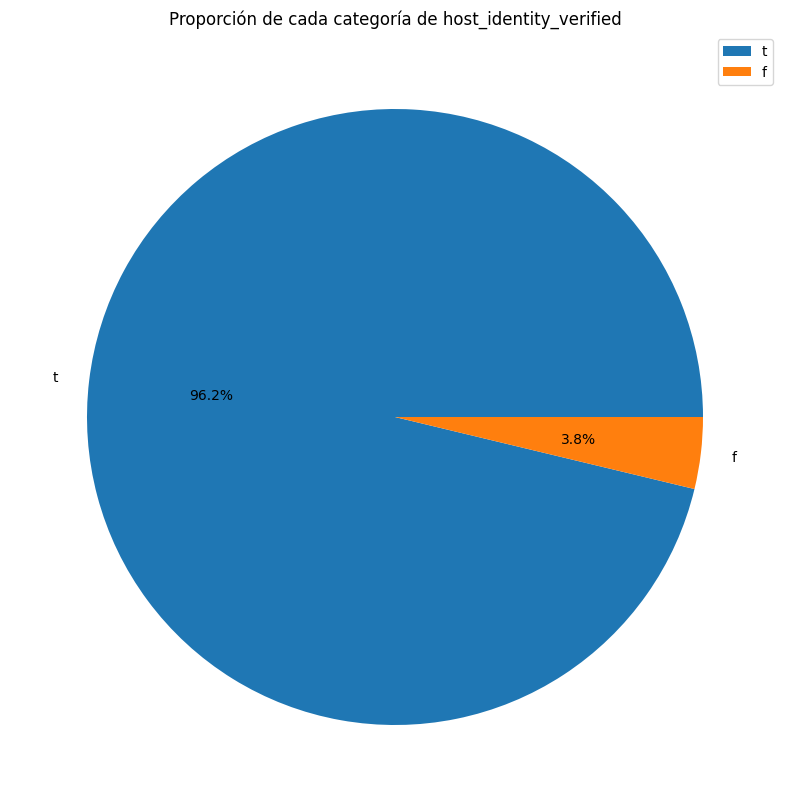

In [440]:
host_identity_verified.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_identity_verified")
plt.ylabel("")

#### Variable "neighbourhood_cleansed"

In [441]:
neighbourhood_cleansed = fp.freq_tbl(df["neighbourhood_cleansed"])
neighbourhood_cleansed.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
neighbourhood_cleansed

,neighbourhood_cleansed,frequency
0,Centro Storico,9284
1,Campo di Marte,1341
2,Rifredi,1079
3,Isolotto Legnaia,556
4,Gavinana Galluzzo,462


In [442]:
# Ajustamos el índice
neighbourhood_cleansed = neighbourhood_cleansed.set_index("neighbourhood_cleansed")
neighbourhood_cleansed

,frequency
neighbourhood_cleansed,
Centro Storico,9284
Campo di Marte,1341
Rifredi,1079
Isolotto Legnaia,556
Gavinana Galluzzo,462


Text(0, 0.5, 'Frecuencia')

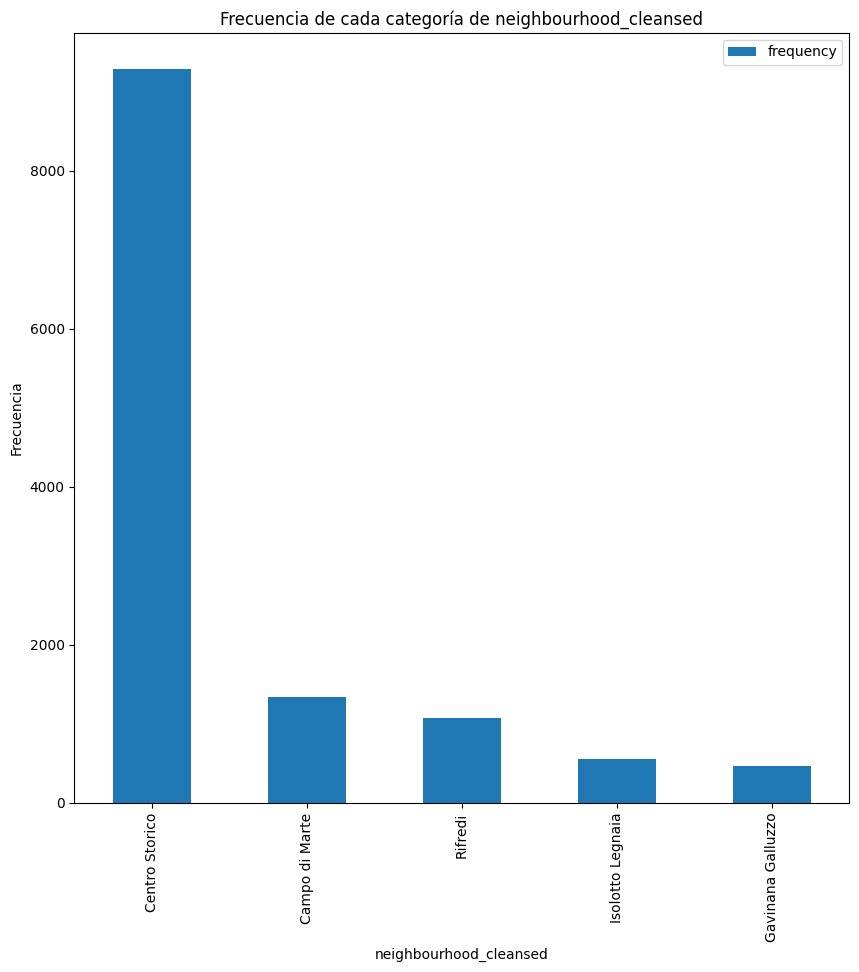

In [443]:
neighbourhood_cleansed.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de neighbourhood_cleansed")
plt.ylabel("Frecuencia")

#### Variable "property_type"

In [444]:
property_type = fp.freq_tbl(df["property_type"])
property_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
property_type

,property_type,frequency
0,Entire rental unit,7104
1,Entire condo,2483
2,Private room in rental unit,799
3,Private room in bed and breakfast,378
4,Entire home,354
5,Private room in condo,293
6,Entire loft,264
7,Room in boutique hotel,157
8,Room in hotel,154
9,Private room in home,135


In [445]:
# Ajustamos el índice
property_type = property_type.set_index("property_type")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
property_type = property_type.head(5)
property_type

,frequency
property_type,
Entire rental unit,7104
Entire condo,2483
Private room in rental unit,799
Private room in bed and breakfast,378
Entire home,354


Text(0, 0.5, 'Frecuencia')

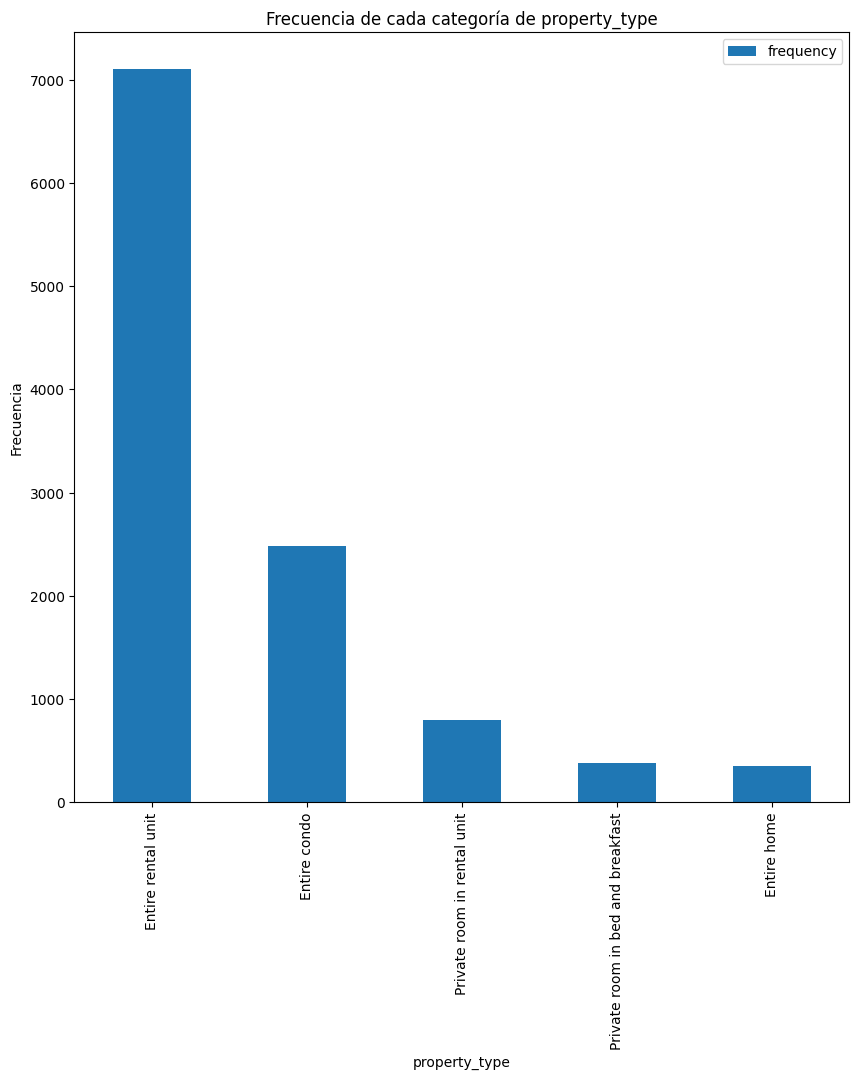

In [446]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
property_type.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de property_type")
plt.ylabel("Frecuencia")

#### Variable "room_type"

In [447]:
room_type = fp.freq_tbl(df["room_type"])
room_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
room_type

,room_type,frequency
0,Entire home/apt,10566
1,Private room,2035
2,Hotel room,86
3,Shared room,35


In [448]:
# Ajustamos el índice
room_type = room_type.set_index("room_type")
room_type

,frequency
room_type,
Entire home/apt,10566
Private room,2035
Hotel room,86
Shared room,35


Text(0, 0.5, '')

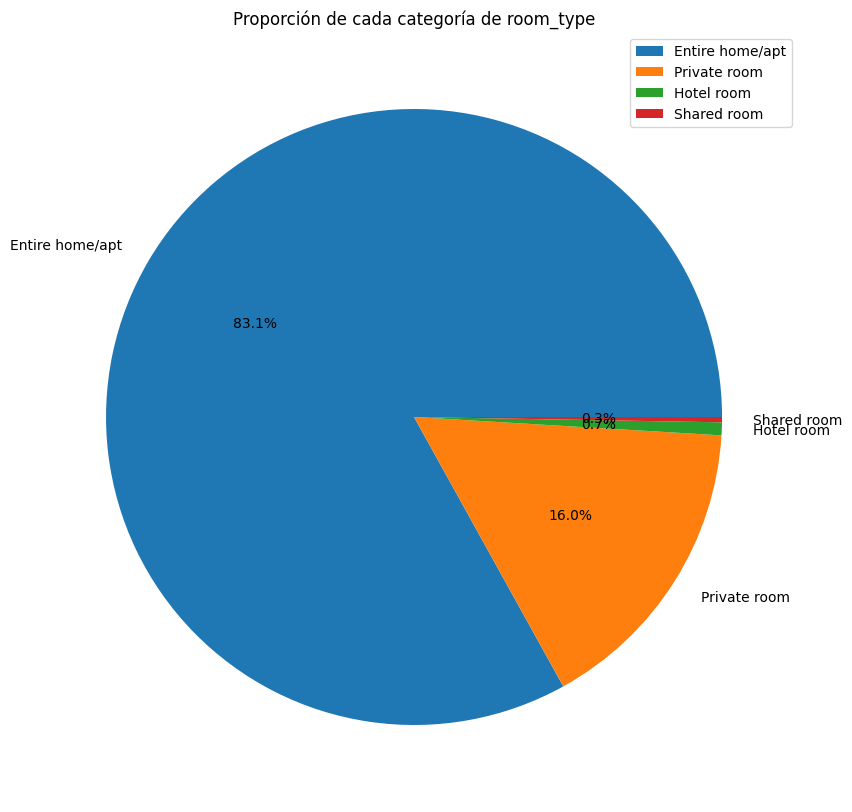

In [449]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
room_type.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de room_type")
plt.ylabel("")

#### Variable "bathrooms_text"

In [450]:
df["bathrooms_text"].value_counts()

bathrooms_text
1 bath               7398
2 baths              2350
1 private bath       1086
1.5 baths             497
1 shared bath         480
3 baths               381
2.5 baths             136
4 baths                99
2 shared baths         91
3.5 baths              42
1.5 shared baths       27
5 baths                26
6 baths                20
0 baths                19
Half-bath              15
4.5 baths              14
Shared half-bath        8
0 shared baths          7
5.5 baths               7
6.5 baths               3
Private half-bath       3
3 shared baths          2
9 baths                 2
8 baths                 2
8.5 baths               1
7 baths                 1
13 baths                1
2.5 shared baths        1
13.5 baths              1
4 shared baths          1
12 baths                1
Name: count, dtype: int64

In [451]:
# Haremos el análisis univariado de la variable "bathrooms_text"
bathrooms_text = fp.freq_tbl(df["bathrooms_text"])
# Eliminaremos el primer número y solo dejaremos la categoría (por ejemplo, "1.0 baths" -> "baths")
# Ignoraremos los errores por problemas de formato
bathrooms_text["bathrooms_text"] = bathrooms_text["bathrooms_text"].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) > 1 else x)
bathrooms_text = fp.freq_tbl(bathrooms_text["bathrooms_text"])
bathrooms_text.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
bathrooms_text

,bathrooms_text,frequency
0,baths,19
1,shared,7
2,half-bath,2
3,bath,1
4,private,1
5,Half-bath,1


In [452]:
# Ajustamos el índice
bathrooms_text = bathrooms_text.set_index("bathrooms_text")
# Quitamos los valores de un único valor
bathrooms_text = bathrooms_text[bathrooms_text["frequency"] > 1]
bathrooms_text

,frequency
bathrooms_text,
baths,19
shared,7
half-bath,2


Text(0, 0.5, '')

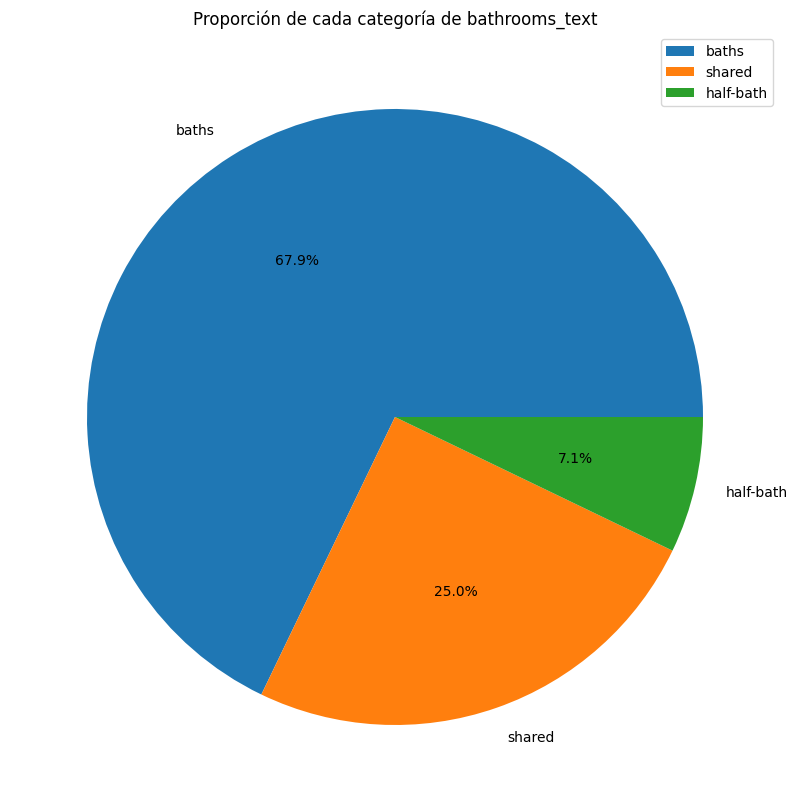

In [453]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
bathrooms_text.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de bathrooms_text")
plt.ylabel("")

#### Variable "has_availability"

In [454]:
has_availability = fp.freq_tbl(df["has_availability"])
has_availability.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
has_availability

,has_availability,frequency
0,t,12683
1,f,39


In [455]:
# Ajustamos el índice
has_availability = has_availability.set_index("has_availability")
has_availability

,frequency
has_availability,
t,12683
f,39


Text(0, 0.5, '')

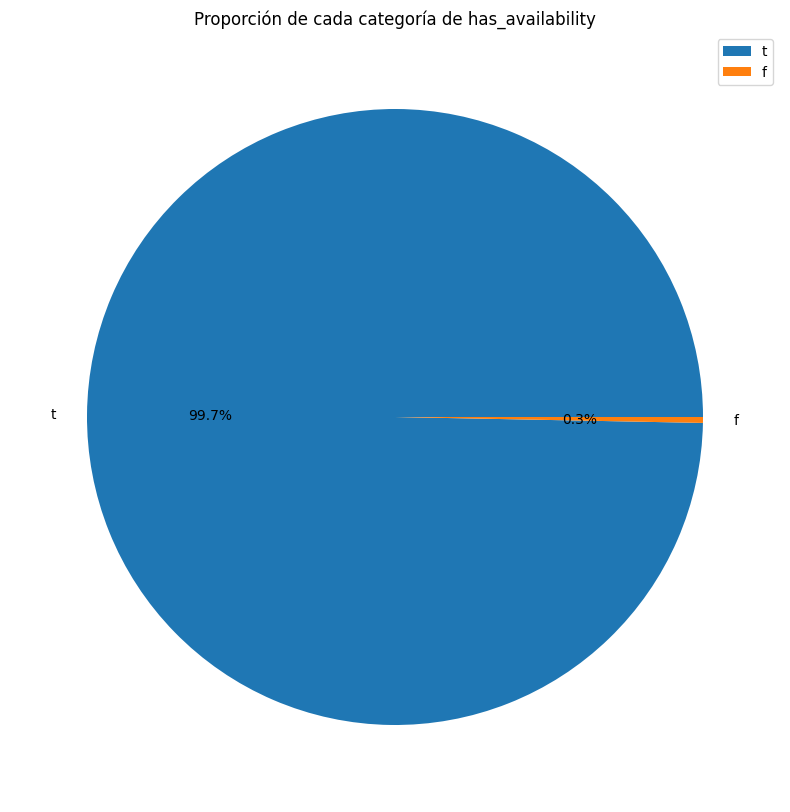

In [456]:
has_availability.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de has_availability")
plt.ylabel("")

#### Variable "instant_bookable"

In [457]:
instant_bookable = fp.freq_tbl(df["instant_bookable"])
instant_bookable.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
instant_bookable

,instant_bookable,frequency
0,t,7767
1,f,4955


In [458]:
instant_bookable = instant_bookable.set_index("instant_bookable")
instant_bookable

,frequency
instant_bookable,
t,7767
f,4955


Text(0, 0.5, '')

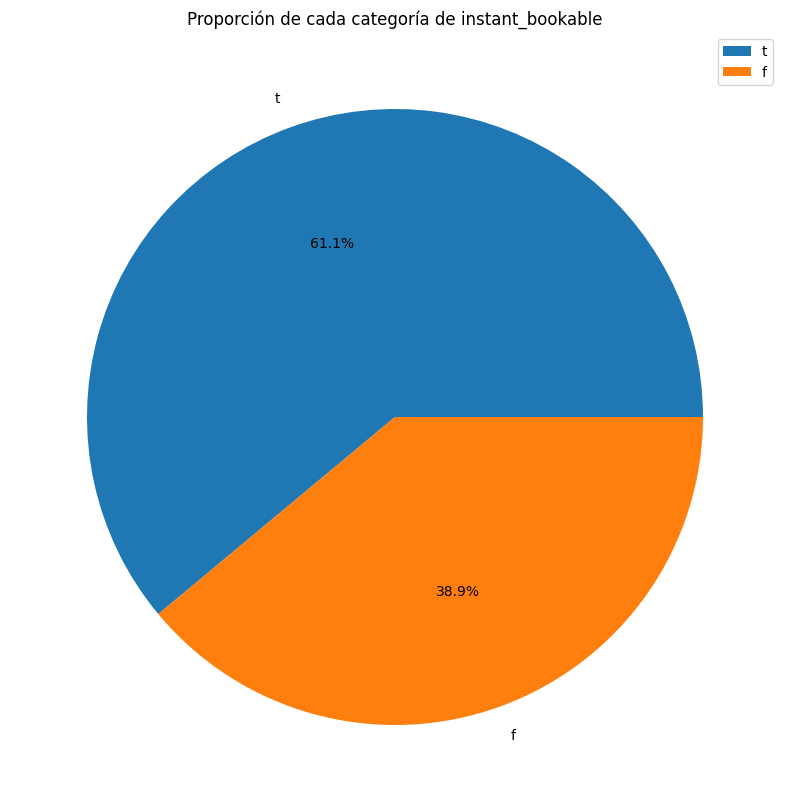

In [459]:
instant_bookable.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de instant_bookable")
plt.ylabel("")

#### Variable "host_location"

In [460]:
host_location = fp.freq_tbl(df["host_location"])
host_location.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_location

,host_location,frequency
0,"Florence, Italy",8751
1,Italy,2488
2,"Milan, Italy",227
3,"Tuscany, Italy",93
4,"Prato, Italy",77
...,...,...
259,"Baugé-en-Anjou, France",1
260,"Vimodrone, Italy",1
261,"Comeana, Italy",1
262,"Guayaquil, Ecuador",1


In [461]:
host_location = host_location.set_index("host_location")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
host_location = host_location.head(5)
host_location

,frequency
host_location,
"Florence, Italy",8751
Italy,2488
"Milan, Italy",227
"Tuscany, Italy",93
"Prato, Italy",77


Text(0, 0.5, 'Frecuencia')

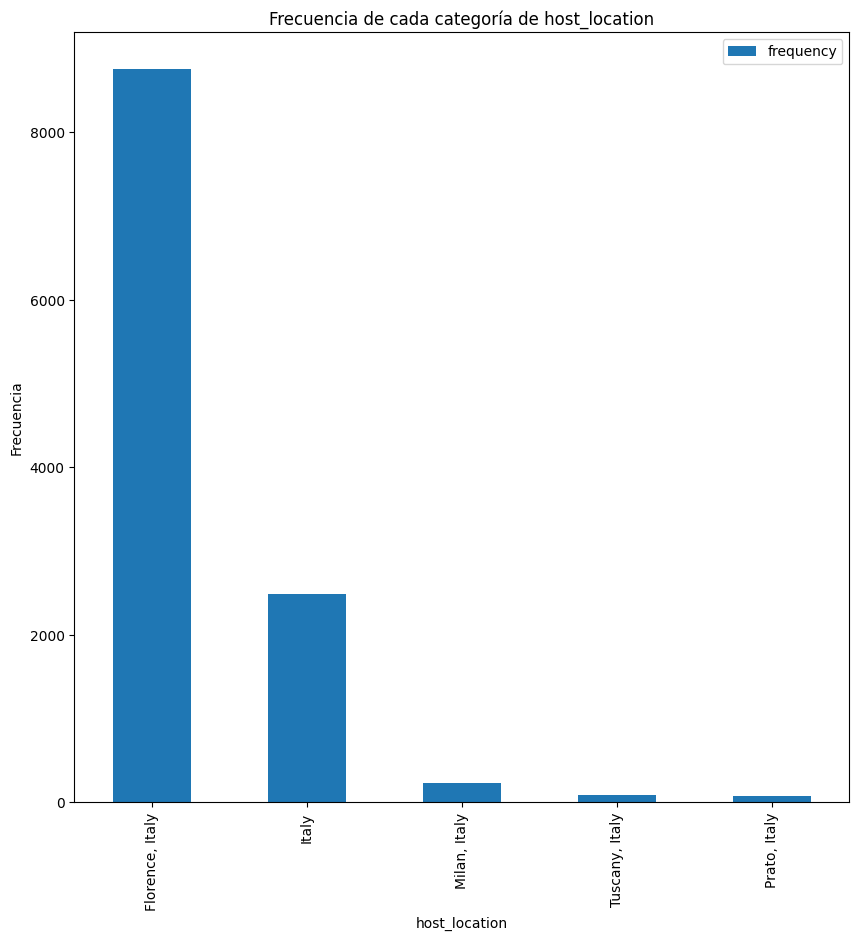

In [462]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_location.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_location")
plt.ylabel("Frecuencia")

#### Variable "host_verifications"

In [463]:
host_verifications = fp.freq_tbl(df["host_verifications"])
host_verifications.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_verifications

,host_verifications,frequency
0,"['email', 'phone']",10126
1,"['email', 'phone', 'work_email']",1643
2,['phone'],652
3,"['phone', 'work_email']",289
4,['email'],12


In [464]:
host_verifications = host_verifications.set_index("host_verifications")
host_verifications

,frequency
host_verifications,
"['email', 'phone']",10126
"['email', 'phone', 'work_email']",1643
['phone'],652
"['phone', 'work_email']",289
['email'],12


Text(0, 0.5, 'Frecuencia')

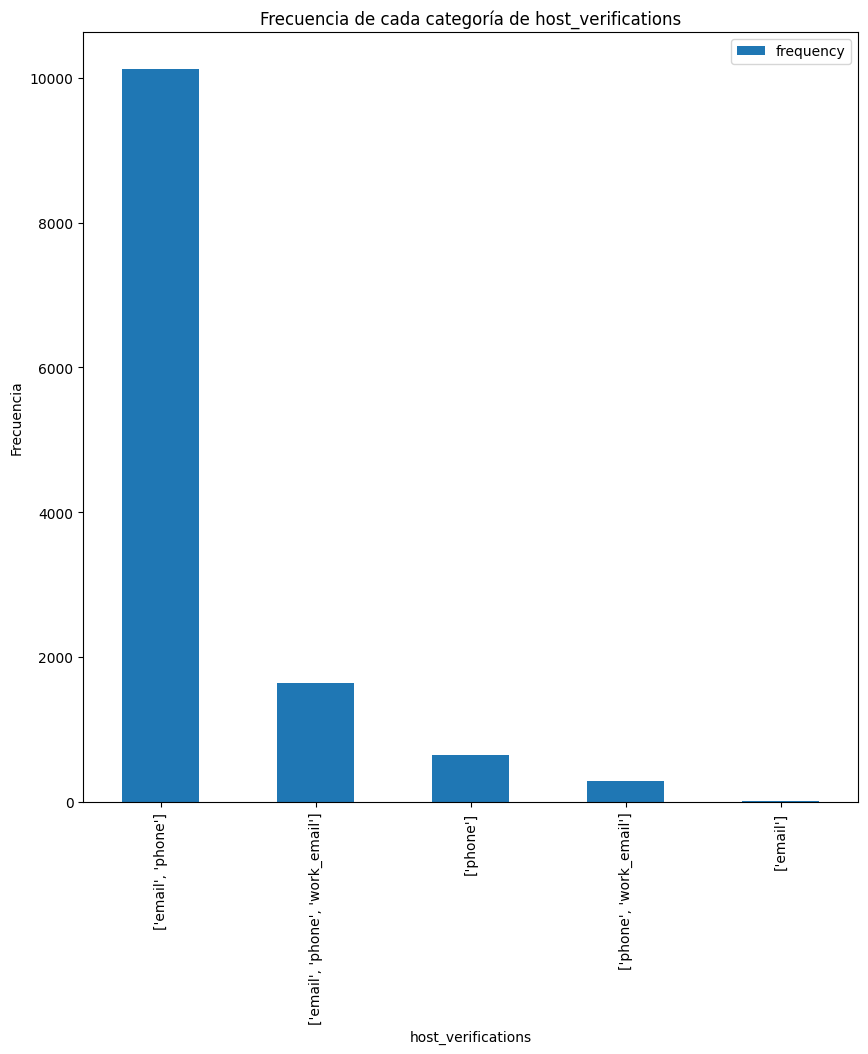

In [465]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_verifications.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_verifications")
plt.ylabel("Frecuencia")

#### Categorización de Variables

In [ ]:
df2 = pd.read_csv('listings - Florencia_clean.csv')
df2.isnull().sum().sum()

0

#### Variable "host_response_rate"

In [467]:
# Procesamiento requerido para convertir la variable "host_response_rate" en numérica
df2["host_response_rate"] = df2["host_response_rate"].apply(lambda x: x[:-1] if type(x) == str else x)
df2["host_response_rate"] = pd.to_numeric(df2["host_response_rate"], errors='coerce')
df2["host_response_rate"] = df2["host_response_rate"].fillna(0)

In [468]:
# Determinación de la cantidad de clases a crear

# Calculamos el numero total de la poblacion "n"
n = df2["host_response_rate"].count()
# Obtenemos el limite inferior y superior del intervalo de clase
Max=df2["host_response_rate"].max()
Min=df2["host_response_rate"].min()
Limites = [Min, Max]
# Calculamos el rango r
R = Max - Min
# Calculamos el número de intervalos de clase "ni", aplocando la regla de Sturges
ni = 1+3.32*np.log10(n)
# Calculamos el ancho del intervalo "i"
i = R/ni

print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  6.8366139981485885


In [469]:
# Creación de las intervalos y clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_response_rate"] = pd.cut(df2["host_response_rate"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_response_rate"]

0        Clase 14
1        Clase 14
2        Clase 14
3        Clase 14
4        Clase 14
           ...   
12717    Clase 14
12718     Clase 1
12719     Clase 1
12720    Clase 14
12721    Clase 14
Name: host_response_rate, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "host_acceptance_rate"

In [470]:
# Procesamiento requerido para convertir la variable "host_response_rate" en numérica
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].apply(lambda x: x[:-1] if type(x) == str else x)
df2["host_acceptance_rate"] = pd.to_numeric(df2["host_acceptance_rate"], errors='coerce')
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].fillna(0)

In [471]:
# Determinación de la cantidad de clases a crear
n = df2["host_acceptance_rate"].count()
Max=df2["host_acceptance_rate"].max()
Min=df2["host_acceptance_rate"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  6.8366139981485885


In [472]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_acceptance_rate"] = pd.cut(df2["host_acceptance_rate"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_acceptance_rate"]

0        Clase 14
1         Clase 4
2        Clase 10
3        Clase 10
4        Clase 10
           ...   
12717    Clase 14
12718    Clase 14
12719     Clase 1
12720    Clase 14
12721    Clase 14
Name: host_acceptance_rate, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "host_total_listings_count"

In [473]:
# Determinación de la cantidad de clases a crear
n = df2["host_total_listings_count"].count()
Max=df2["host_total_listings_count"].max()
Min=df2["host_total_listings_count"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  2.8030117392409215


In [474]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_total_listings_count"] = pd.cut(df2["host_total_listings_count"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_total_listings_count"]

0        Clase 14
1         Clase 1
2         Clase 1
3         Clase 4
4         Clase 4
           ...   
12717     Clase 2
12718     Clase 1
12719     Clase 1
12720     Clase 1
12721     Clase 5
Name: host_total_listings_count, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "accommodates"

In [475]:
# Determinación de la cantidad de clases a crear
n = df2["accommodates"].count()
Max=df2["accommodates"].max()
Min=df2["accommodates"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.4101968398889153


In [476]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["accommodates"] = pd.cut(df2["accommodates"], bins=intervalos, labels=categorias, include_lowest=True)
df2["accommodates"]

0         Clase 3
1         Clase 3
2         Clase 7
3         Clase 3
4         Clase 3
           ...   
12717     Clase 7
12718    Clase 12
12719     Clase 7
12720     Clase 7
12721     Clase 7
Name: accommodates, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "bathrooms_text"

In [477]:
# procesamiento requerido para convertir la variable "bathrooms_text" en numérica
df2["bathrooms_text"] = df2["bathrooms_text"].apply(lambda x: x.split(" ")[0] if type(x) == str else x)
df2["bathrooms_text"] = pd.to_numeric(df2["bathrooms_text"], errors='coerce')
df2["bathrooms_text"] = df2["bathrooms_text"].fillna(0)
df2["bathrooms_text"].isnull().sum()

0

In [478]:
# Determinación de la cantidad de clases a crear
n = df2["bathrooms_text"].count()
Max=df2["bathrooms_text"].max()
Min=df2["bathrooms_text"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.9229428897500594


In [479]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["bathrooms_text"] = pd.cut(df2["bathrooms_text"], bins=intervalos, labels=categorias, include_lowest=True)
df2["bathrooms_text"]

0        Clase 2
1        Clase 2
2        Clase 3
3        Clase 1
4        Clase 2
          ...   
12717    Clase 5
12718    Clase 2
12719    Clase 2
12720    Clase 2
12721    Clase 2
Name: bathrooms_text, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "beds"

In [480]:
# Determinación de la cantidad de clases a crear
n = df2["beds"].count()
Max=df2["beds"].max()
Min=df2["beds"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.4101968398889153


In [481]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["beds"] = pd.cut(df2["beds"], bins=intervalos, labels=categorias, include_lowest=True)
df2["beds"]

0         Clase 3
1         Clase 3
2        Clase 10
3         Clase 3
4         Clase 3
           ...   
12717    Clase 10
12718     Clase 7
12719     Clase 7
12720     Clase 5
12721     Clase 5
Name: beds, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "price"

In [482]:
# Determinación de la cantidad de clases a crear
n = df2["price"].count()
Max=df2["price"].max()
Min=df2["price"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  28.030117392409213


In [483]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["price"] = pd.cut(df2["price"], bins=intervalos, labels=categorias, include_lowest=True)
df2["price"]

0        Clase 3
1        Clase 3
2        Clase 5
3        Clase 4
4        Clase 4
          ...   
12717    Clase 6
12718    Clase 7
12719    Clase 3
12720    Clase 8
12721    Clase 4
Name: price, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "number_of_reviews_ltm"

In [484]:
# Determinación de la cantidad de clases a crear
n = df2["number_of_reviews_ltm"].count()
Max=df2["number_of_reviews_ltm"].max()
Min=df2["number_of_reviews_ltm"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  4.64889751874104


In [485]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["number_of_reviews_ltm"] = pd.cut(df2["number_of_reviews_ltm"], bins=intervalos, labels=categorias, include_lowest=True)
df2["number_of_reviews_ltm"]

0        Clase 2
1        Clase 1
2        Clase 1
3        Clase 2
4        Clase 1
          ...   
12717    Clase 1
12718    Clase 1
12719    Clase 1
12720    Clase 1
12721    Clase 1
Name: number_of_reviews_ltm, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "availability_365"

In [486]:
# Determinación de la cantidad de clases a crear
n = df2["availability_365"].count()
Max=df2["availability_365"].max()
Min=df2["availability_365"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  24.95364109324235


In [487]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["availability_365"] = pd.cut(df2["availability_365"], bins=intervalos, labels=categorias, include_lowest=True)
df2["availability_365"]

0        Clase 13
1         Clase 1
2        Clase 10
3        Clase 14
4        Clase 13
           ...   
12717    Clase 12
12718    Clase 14
12719     Clase 6
12720    Clase 14
12721     Clase 6
Name: availability_365, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "number_of_reviews"

In [488]:
# Determinación de la cantidad de clases a crear
n = df2["number_of_reviews"].count()
Max=df2["number_of_reviews"].max()
Min=df2["number_of_reviews"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  14.151790976167579


In [489]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["number_of_reviews"] = pd.cut(df2["number_of_reviews"], bins=intervalos, labels=categorias, include_lowest=True)
df2["number_of_reviews"]

0        Clase 9
1        Clase 2
2        Clase 3
3        Clase 6
4        Clase 2
          ...   
12717    Clase 1
12718    Clase 1
12719    Clase 1
12720    Clase 1
12721    Clase 1
Name: number_of_reviews, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_scores_location"

In [490]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_location"].count()
Max=df2["review_scores_location"].max()
Min=df2["review_scores_location"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.060162203183707574


In [491]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_location"] = pd.cut(df2["review_scores_location"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_location"]

0        Clase 13
1         Clase 9
2        Clase 12
3        Clase 13
4        Clase 14
           ...   
12717    Clase 11
12718    Clase 11
12719    Clase 11
12720    Clase 11
12721    Clase 11
Name: review_scores_location, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_scores_value"

In [492]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_value"].count()
Max=df2["review_scores_value"].max()
Min=df2["review_scores_value"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.07998838377833849


In [493]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_value"] = pd.cut(df2["review_scores_value"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_value"]

0        Clase 11
1        Clase 10
2        Clase 13
3         Clase 9
4         Clase 6
           ...   
12717    Clase 11
12718    Clase 11
12719    Clase 11
12720    Clase 11
12721    Clase 11
Name: review_scores_value, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_per_month"

In [494]:
# Determinación de la cantidad de clases a crear
n = df2["reviews_per_month"].count()
Max=df2["reviews_per_month"].max()
Min=df2["reviews_per_month"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.44096160288058395


In [495]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["reviews_per_month"] = pd.cut(df2["reviews_per_month"], bins=intervalos, labels=categorias, include_lowest=True)
df2["reviews_per_month"]

0        Clase 2
1        Clase 1
2        Clase 1
3        Clase 1
4        Clase 1
          ...   
12717    Clase 3
12718    Clase 3
12719    Clase 3
12720    Clase 3
12721    Clase 3
Name: reviews_per_month, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_scores_communication"

In [496]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_communication"].count()
Max=df2["review_scores_communication"].max()
Min=df2["review_scores_communication"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.05195826638592926


In [497]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_communication"] = pd.cut(df2["review_scores_communication"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_communication"]

0        Clase 13
1        Clase 14
2         Clase 9
3        Clase 10
4         Clase 8
           ...   
12717    Clase 13
12718    Clase 13
12719    Clase 13
12720    Clase 13
12721    Clase 13
Name: review_scores_communication, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_scores_checkin"

In [498]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_checkin"].count()
Max=df2["review_scores_checkin"].max()
Min=df2["review_scores_checkin"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.051274604986114414


In [499]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_checkin"] = pd.cut(df2["review_scores_checkin"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_checkin"]

0        Clase 12
1        Clase 12
2        Clase 11
3        Clase 11
4         Clase 9
           ...   
12717    Clase 13
12718    Clase 13
12719    Clase 13
12720    Clase 13
12721    Clase 13
Name: review_scores_checkin, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_scores_cleanliness"

In [500]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_cleanliness"].count()
Max=df2["review_scores_cleanliness"].max()
Min=df2["review_scores_cleanliness"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.06768247858167104


In [501]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_cleanliness"] = pd.cut(df2["review_scores_cleanliness"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_cleanliness"]

0        Clase 13
1        Clase 13
2        Clase 12
3         Clase 9
4         Clase 9
           ...   
12717    Clase 12
12718    Clase 12
12719    Clase 12
12720    Clase 12
12721    Clase 12
Name: review_scores_cleanliness, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']

#### Variable "review_scores_accuracy"

In [502]:
# Determinación de la cantidad de clases a crear
n = df2["review_scores_accuracy"].count()
Max=df2["review_scores_accuracy"].max()
Min=df2["review_scores_accuracy"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  14.627123898918503
Ancho del intervalo:  0.058111218984262976


In [503]:
# Creación de los intervalos y las clases
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_accuracy"] = pd.cut(df2["review_scores_accuracy"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_accuracy"]

0        Clase 10
1        Clase 13
2        Clase 11
3         Clase 9
4         Clase 1
           ...   
12717    Clase 11
12718    Clase 11
12719    Clase 11
12720    Clase 11
12721    Clase 11
Name: review_scores_accuracy, Length: 12722, dtype: category
Categories (14, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 11' < 'Clase 12' < 'Clase 13' < 'Clase 14']